# 2. Datos

Idealmente, lo que queremos es un grupo heterogéneo de imágenes de carros, acompañadas de fotos de elementos que claramente no son autos, de manera que podamos enseñarle a nuestro modelo a distinguir entre ambos.

La variedad aquí es  importante porque, como ya sabemos, los carros vienen en un sinfín de formas y colores. No nos sirve de nada un modelo que sólo reconozca camiones o Volkswagen Escarabajos blancos, sino cualquier carro.

## ¿Qué data se encuentra disponible?

Una método sería salir y tomar fotos de tantos carros como podamos. Aunque podría ser una aventura divertida, no sería escalable (¡El tiempo es dinero!).

Afortunadamente, existen muchos conjuntos de datos publicos en los que nos podemos apoyar para ahorrar tiempo. He aquí algunos de ellos con su descripción original (en inglés).

  - [Vehicle Make and Model Recognition Dataset (VMMRdb)](http://vmmrdb.cecsresearch.org/): _The Vehicle Make and Model Recognition dataset (VMMRdb) is large in scale and diversity, containing 9,170 classes consisting of 291,752 images, covering models manufactured between 1950 to 2016. VMMRdb dataset contains images that were taken by different users, different imaging devices, and multiple view angles, ensuring a wide range of variations to account for various scenarios that could be encountered in a real-life scenario. The cars are not well aligned, and some images contain irrelevant background. The data was gathered by crawling web pages related to vehicle sales on craigslist.com, including 712 areas covering all 412 sub-domains corresponding to US metro areas. Our dataset can be used as a baseline for training a robust model in several real-life scenarios._
  - [Udacity Self-Driving Car](https://github.com/udacity/self-driving-car): _223GB of image frames and log data from 70 minutes of driving in Mountain View on two separate days, with one day being sunny, and the other overcast._
  - [The Comprehensive Cars (CompCars) dataset](http://mmlab.ie.cuhk.edu.hk/datasets/comp_cars/index.html): _The Comprehensive Cars (CompCars) dataset contains data from two scenarios, including images from web-nature and surveillance-nature. The web-nature data contains 163 car makes with 1,716 car models. There are a total of 136,726 images capturing the entire cars and 27,618 images capturing the car parts. The full car images are labeled with bounding boxes and viewpoints. Each car model is labeled with five attributes, including maximum speed, displacement, number of doors, number of seats, and type of car. The surveillance-nature data contains 50,000 car images captured in the front view. Please refer to our paper for the details. The dataset is well prepared for the following computer vision tasks: Fine-grained classification Attribute prediction Car model verification The train/test subsets of these tasks introduced in our paper are included in the dataset. Researchers are also welcome to utilize it for any other tasks such as image ranking, multi-task learning, and 3D reconstruction._
  - [Stanford Cars Dataset](http://ai.stanford.edu/~jkrause/cars/car_dataset.html): _The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe._

## Sin embargo...

... ¡Usaremos uno diferente!!

Usaremos la [Vehicle Image Database](https://www.gti.ssr.upm.es/data/Vehicle_database.html). Esta es la descripción oficial:

> El Grupo de Procesamiento de Imágenes está actualmente realizando investigaciones en la tarea de clasificación de vehículos basada en visión. Con el fin de evaluar nuestros métodos, hemos creado una nueva base de datos de imágenes que hemos extraído de nuestras secuencias de video (adquiridas mediante una cámara montada sobre un vehículo). La base de datos contiene 3425 imágenes de la parte trasera de vehículos tomadas desde distintos ángulos, y 3900 imágenes extraidas de secuencias de caminos que no contienen vehículos. Las imágenes fueron seleccionadas para maximizar la representación de la clase _vehículo_, la cual naturalmente es muy variable. En nuestra opinión, una característica importante que afecta la apariencia del carro visto desde atrás es su posición relativa a la cámara. Por lo tanto, la base de datos separa las imágenes en cuatro regiones distintas, con base a la posición: Rango cercano o medio en frente a la cámara, rango cercano a medio a la izquierda, rango cercano o medio a la derecha y rango lejano. Adicionalmente, las imágenes se extrajeron de tal forma que no se ajusten perfectamente al contorno del vehículo, con el fin de crear un clasificador más robusto. En cambios, algunas imágenes contienen al vehículo en compañía de ciertas porciones del fondo, mientras que otras lo contienen parcialmente. Las imágenes son de 64x64 y fueron recortadas de secuencias de 360x256 píxeles grabadas en autopistas de Madrid, Bruselas y Turín.

Entre las principales razones por las que nos decidimos por este conjunto de datos están:

 - La data ya se encuentra dividida en las categorías _carro_ y _no carro_.
 - Es lo suficientemente pequeño para permitirnos experimentar rápidamente y mantener este proyecto breve y enfocado.


## Exploremos

Los datos están en la carpeta `data/`. Las imágenes de carros se encuentran en la subcarpeta `vehicles`, y las restantes en `non-vehicles`.

Veamos primero cuántas imágenes hay por categoría:

In [1]:
import glob
vehicles_images_path = glob.glob('data/vehicles/*/*.png')
print(f'There are {len(vehicles_images_path)} images of cars.')

non_vehicles_images_path = glob.glob('data/non-vehicles/*/*.png')
print(f'There are {len(non_vehicles_images_path)} images of non-cars.')

There are 3425 images of cars.
There are 3900 images of non-cars.


Bien. Estamos tratando con un conjunto de datos más o menos balanceado. Eso nos facilitará la vida, puesto que podemos utilizar _accuracy_ como nuestra métrica.

Sólo para hacer la información más atractiva visualmente, dibujemos un gráfico de barras:

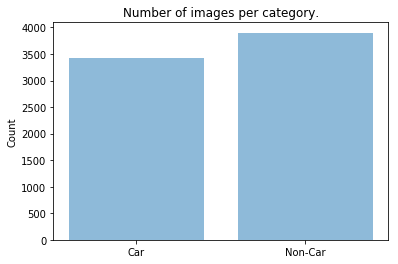

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
 
categories = ['Car', 'Non-Car']
y_pos = np.arange(2)
count_per_category = [len(vehicles_images_path), len(non_vehicles_images_path)]
 
plt.bar(y_pos, count_per_category, align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('Count')
plt.title('Number of images per category.')
 
plt.show()

Ahora, echemos un vistazo a unas cuantas imágenes:

In [3]:
import cv2

def plot_random_sample(images_path, sample_size, title):
    # Plot the images in the sample
    figure = plt.figure(figsize=(25, 25))

    sample = np.random.choice(images_path, sample_size)
    for sample_index, image_path in enumerate(sample):
        ax = figure.add_subplot(1, sample_size, sample_index + 1, xticks=[], yticks=[])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.set_title(title)

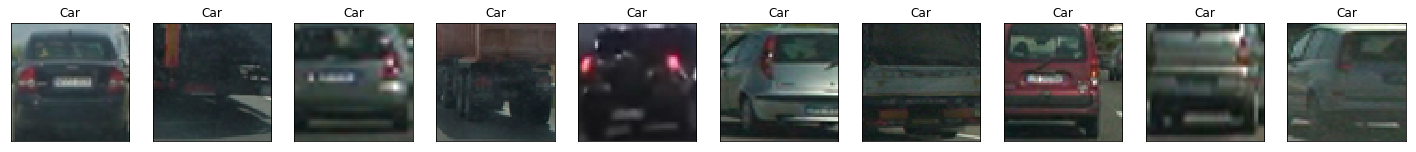

In [4]:
plot_random_sample(vehicles_images_path, 10, 'Car')

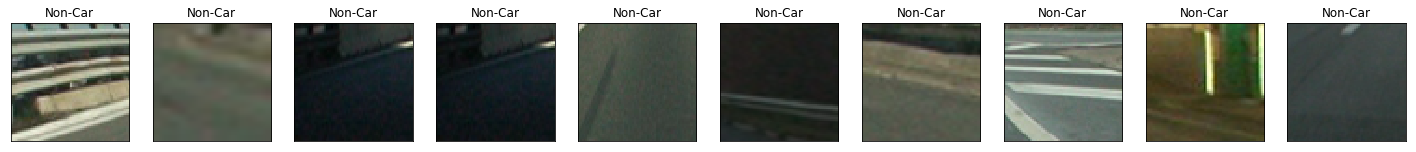

In [5]:
plot_random_sample(non_vehicles_images_path, 10, 'Non-Car')

Podemos percatarnos de que la categoría `vehicles` contiene desde camiones hasta compactos, lo cual está muy bien porque le dará a nuestro clasificador una perspectiva más amplia de lo que es un carro.

Similarmente, la categoría `non-vehicles` está compuesta, en su mayoría, de elementos que encontraríamos en una carretera, lo cual resulta muy útil si queremos usar nuestro modelo en un vehículo autónomo.

## Una última verificación

Validemos que, en efecto, todas las imágenes sean de 64x64x63, tal y como lo afirma la descripción oficial del conjunto de datos.

In [6]:
assert all(cv2.imread(i).shape == (64, 64, 3) for i in vehicles_images_path)
assert all(cv2.imread(i).shape == (64, 64, 3) for i in non_vehicles_images_path)